In [2]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("display.max_rows", None)
np.random.seed(42)

In [3]:
# Make inline plots vector graphics
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("pdf", "svg")

#matplotlib.rc("font", **{"family": "serif", "serif": ["Computer Modern"]})
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsfonts} \usepackage{amsmath}"

# Data Preparation

In [4]:
# import the dataset

currency_df = pd.read_csv('currency_exchange_rates_02-01-1995_-_02-05-2018.csv')
currency_df.head(5)

Date  Algerian Dinar  Australian Dollar  Bahrain Dinar  Bolivar Fuerte  \
0  1995-1-2             NaN                NaN            NaN             NaN   
1  1995-1-3             NaN                NaN          0.376             NaN   
2  1995-1-4             NaN             0.7704          0.376             NaN   
3  1995-1-5             NaN             0.7693          0.376             NaN   
4  1995-1-6             NaN             0.7699          0.376             NaN   

   Botswana Pula  Brazilian Real  Brunei Dollar  Canadian Dollar  \
0            NaN             NaN            NaN              NaN   
1            NaN           0.843            NaN           1.4035   
2            NaN           0.844            NaN           1.4026   
3            NaN           0.844            NaN           1.4002   
4            NaN           0.842            NaN           1.4002   

   Chilean Peso  ...  South African Rand  Sri Lanka Rupee  Swedish Krona  \
0           NaN  ...                 NaN              NaN            NaN   
1           NaN  ...                3.55            50.04         7.4588   
2           NaN  ...                3.56            50.07         7.4480   
3           NaN  ...                3.55            50.07         7.4450   
4           NaN  ...                3.56            50.07            NaN   

   Swiss Franc  Thai Baht  Trinidad And Tobago Dollar  Tunisian Dinar  \
0          NaN        NaN                         NaN             NaN   
1       1.3168      25.10                      5.8750             NaN   
2       1.3161      25.13                      5.8738             NaN   
3       1.3080      25.14                      5.8700             NaN   
4       1.3040      25.13                      5.8810             NaN   

   U.A.E. Dirham  U.K. Pound Sterling  U.S. Dollar  
0            NaN                  NaN          1.0  
1          3.671               1.5617          1.0  
2          3.671               1.5605          1.0  
3          3.671               1.5610          1.0  
4          3.671               1.5645          1.0  

[5 rows x 52 columns]

In [5]:
# create a subset of currencies

currency_subset_df = currency_df[['Date', 'Australian Dollar', 
       'Brazilian Real', 'Canadian Dollar', 'Chinese Yuan', 'Euro', 'Indian Rupee',
       'Iranian Rial', 'Israeli New Sheqel', 'Japanese Yen', 
       'Korean Won', 'Malaysian Ringgit', 'Mexican Peso',  
       'Saudi Arabian Riyal', 'Singapore Dollar',
       'South African Rand', 'Swedish Krona', 'Swiss Franc',
       'Thai Baht',  'U.K. Pound Sterling', 'U.S. Dollar']]

currency_subset_df.head(5)

Date  Australian Dollar  Brazilian Real  Canadian Dollar  Chinese Yuan  \
0  1995-1-2                NaN             NaN              NaN           NaN   
1  1995-1-3                NaN           0.843           1.4035           NaN   
2  1995-1-4             0.7704           0.844           1.4026           NaN   
3  1995-1-5             0.7693           0.844           1.4002           NaN   
4  1995-1-6             0.7699           0.842           1.4002           NaN   

   Euro  Indian Rupee  Iranian Rial  Israeli New Sheqel  Japanese Yen  ...  \
0   NaN           NaN           NaN                 NaN           NaN  ...   
1   NaN         31.37   1753.998616                 NaN           NaN  ...   
2   NaN         31.37   1753.525647                 NaN        100.98  ...   
3   NaN         31.37   1746.890000                 NaN        101.00  ...   
4   NaN         31.37   1744.746721                 NaN        100.95  ...   

   Malaysian Ringgit  Mexican Peso  Saudi Arabian Riyal  Singapore Dollar  \
0                NaN           NaN                  NaN               NaN   
1             2.5525           NaN                3.745            1.4563   
2             2.5510           NaN                3.745            1.4537   
3             2.5488           NaN                3.745            1.4520   
4             2.5497           NaN                3.745            1.4527   

   South African Rand  Swedish Krona  Swiss Franc  Thai Baht  \
0                 NaN            NaN          NaN        NaN   
1                3.55         7.4588       1.3168      25.10   
2                3.56         7.4480       1.3161      25.13   
3                3.55         7.4450       1.3080      25.14   
4                3.56            NaN       1.3040      25.13   

   U.K. Pound Sterling  U.S. Dollar  
0                  NaN          1.0  
1               1.5617          1.0  
2               1.5605          1.0  
3               1.5610          1.0  
4               1.5645          1.0  

[5 rows x 21 columns]

In [6]:
# kick out everything before the inception of the EURO on 30-10-1998 (index = 992)

currency_subset_euro_df = currency_subset_df.iloc[992:, :]
currency_subset_euro_df.head(5)

Date  Australian Dollar  Brazilian Real  Canadian Dollar  \
992  1998-10-30             0.6263          1.1914           1.5425   
993   1998-11-2             0.6259             NaN           1.5318   
994   1998-11-3             0.6237          1.1924           1.5238   
995   1998-11-4             0.6308          1.1921           1.5238   
996   1998-11-5             0.6314          1.1908           1.5176   

     Chinese Yuan     Euro  Indian Rupee  Iranian Rial  Israeli New Sheqel  \
992           NaN  1.18398         42.37    1751.65264                 NaN   
993           NaN  1.18373         42.30    1751.36597                 NaN   
994        8.2777  1.17525         42.29    1755.43923                 NaN   
995           NaN  1.17110         42.29    1759.42190                 NaN   
996           NaN  1.17706         42.35    1750.01488                 NaN   

     Japanese Yen  ...  Malaysian Ringgit  Mexican Peso  Saudi Arabian Riyal  \
992        116.40  ...                3.8           NaN                3.745   
993        115.30  ...                3.8           NaN                3.745   
994           NaN  ...                3.8           NaN                3.745   
995        115.85  ...                3.8           NaN                3.745   
996        117.60  ...                3.8           NaN                3.745   

     Singapore Dollar  South African Rand  Swedish Krona  Swiss Franc  \
992             1.622              5.6570         7.8230       1.3459   
993             1.619              5.6165         7.7490       1.3477   
994             1.624              5.6015         7.8235       1.3561   
995             1.621              5.5965         7.8133       1.3689   
996             1.624              5.5865         7.8080       1.3639   

     Thai Baht  U.K. Pound Sterling  U.S. Dollar  
992     36.771               1.6773          1.0  
993     36.683               1.6676          1.0  
994     36.679               1.6552          1.0  
995     36.575               1.6527          1.0  
996     36.442               1.6594          1.0  

[5 rows x 21 columns]

In [7]:
# fill NaNs with bfill

currency_subset_euro_df = currency_subset_euro_df.fillna(method='bfill')

# now fill all NaNs at the end
currency_subset_euro_df = currency_subset_euro_df.fillna(method='ffill')

currency_subset_euro_df.head(5)

Date  Australian Dollar  Brazilian Real  Canadian Dollar  \
992  1998-10-30             0.6263          1.1914           1.5425   
993   1998-11-2             0.6259          1.1924           1.5318   
994   1998-11-3             0.6237          1.1924           1.5238   
995   1998-11-4             0.6308          1.1921           1.5238   
996   1998-11-5             0.6314          1.1908           1.5176   

     Chinese Yuan     Euro  Indian Rupee  Iranian Rial  Israeli New Sheqel  \
992        8.2777  1.18398         42.37    1751.65264               4.217   
993        8.2777  1.18373         42.30    1751.36597               4.217   
994        8.2777  1.17525         42.29    1755.43923               4.217   
995        8.2777  1.17110         42.29    1759.42190               4.217   
996        8.2777  1.17706         42.35    1750.01488               4.217   

     Japanese Yen  ...  Malaysian Ringgit  Mexican Peso  Saudi Arabian Riyal  \
992        116.40  ...                3.8        9.9998                3.745   
993        115.30  ...                3.8        9.9998                3.745   
994        115.85  ...                3.8        9.9998                3.745   
995        115.85  ...                3.8        9.9998                3.745   
996        117.60  ...                3.8        9.9998                3.745   

     Singapore Dollar  South African Rand  Swedish Krona  Swiss Franc  \
992             1.622              5.6570         7.8230       1.3459   
993             1.619              5.6165         7.7490       1.3477   
994             1.624              5.6015         7.8235       1.3561   
995             1.621              5.5965         7.8133       1.3689   
996             1.624              5.5865         7.8080       1.3639   

     Thai Baht  U.K. Pound Sterling  U.S. Dollar  
992     36.771               1.6773          1.0  
993     36.683               1.6676          1.0  
994     36.679               1.6552          1.0  
995     36.575               1.6527          1.0  
996     36.442               1.6594          1.0  

[5 rows x 21 columns]

In [8]:
import datetime as dt

currency_subset_euro_df['Date'] = pd.to_datetime(currency_subset_euro_df['Date'], errors='coerce')

currency_subset_euro_df['Day'] = currency_subset_euro_df['Date'].dt.day
currency_subset_euro_df['Month'] = currency_subset_euro_df['Date'].dt.month
currency_subset_euro_df['Year'] = currency_subset_euro_df['Date'].dt.year

currency_subset_euro_df = currency_subset_euro_df.reset_index(drop=True)
currency_subset_euro_df.head(5)

Date  Australian Dollar  Brazilian Real  Canadian Dollar  \
0 1998-10-30             0.6263          1.1914           1.5425   
1 1998-11-02             0.6259          1.1924           1.5318   
2 1998-11-03             0.6237          1.1924           1.5238   
3 1998-11-04             0.6308          1.1921           1.5238   
4 1998-11-05             0.6314          1.1908           1.5176   

   Chinese Yuan     Euro  Indian Rupee  Iranian Rial  Israeli New Sheqel  \
0        8.2777  1.18398         42.37    1751.65264               4.217   
1        8.2777  1.18373         42.30    1751.36597               4.217   
2        8.2777  1.17525         42.29    1755.43923               4.217   
3        8.2777  1.17110         42.29    1759.42190               4.217   
4        8.2777  1.17706         42.35    1750.01488               4.217   

   Japanese Yen  ...  Singapore Dollar  South African Rand  Swedish Krona  \
0        116.40  ...             1.622              5.6570         7.8230   
1        115.30  ...             1.619              5.6165         7.7490   
2        115.85  ...             1.624              5.6015         7.8235   
3        115.85  ...             1.621              5.5965         7.8133   
4        117.60  ...             1.624              5.5865         7.8080   

   Swiss Franc  Thai Baht  U.K. Pound Sterling  U.S. Dollar  Day  Month  Year  
0       1.3459     36.771               1.6773          1.0   30     10  1998  
1       1.3477     36.683               1.6676          1.0    2     11  1998  
2       1.3561     36.679               1.6552          1.0    3     11  1998  
3       1.3689     36.575               1.6527          1.0    4     11  1998  
4       1.3639     36.442               1.6594          1.0    5     11  1998  

[5 rows x 24 columns]

In [9]:
currency_subset_euro_df.columns

Index(['Date', 'Australian Dollar', 'Brazilian Real', 'Canadian Dollar',
       'Chinese Yuan', 'Euro', 'Indian Rupee', 'Iranian Rial',
       'Israeli New Sheqel', 'Japanese Yen', 'Korean Won', 'Malaysian Ringgit',
       'Mexican Peso', 'Saudi Arabian Riyal', 'Singapore Dollar',
       'South African Rand', 'Swedish Krona', 'Swiss Franc', 'Thai Baht',
       'U.K. Pound Sterling', 'U.S. Dollar', 'Day', 'Month', 'Year'],
      dtype='object')

In [10]:
# let's plot this mess

dates = currency_subset_euro_df['Date']
years = currency_subset_euro_df['Year']
australian_dollar = currency_subset_euro_df['Australian Dollar']
brazilian_real = currency_subset_euro_df['Brazilian Real']
canadian_dollar = currency_subset_euro_df['Canadian Dollar']
chinese_yuan = currency_subset_euro_df['Chinese Yuan']
euro = currency_subset_euro_df['Euro']
indian_rupee = currency_subset_euro_df['Indian Rupee']
iranian_rial = currency_subset_euro_df['Iranian Rial']
israeli_sheqel = currency_subset_euro_df['Israeli New Sheqel']
japanese_yen = currency_subset_euro_df['Japanese Yen']
korean_won = currency_subset_euro_df['Korean Won']
malaysian_ringgit = currency_subset_euro_df['Malaysian Ringgit']
mexican_peso = currency_subset_euro_df['Mexican Peso']
saudi_arabian_riyal = currency_subset_euro_df['Saudi Arabian Riyal']
singapore_dollar = currency_subset_euro_df['Singapore Dollar']
south_african_rand = currency_subset_euro_df['South African Rand']
swedish_krona = currency_subset_euro_df['Swedish Krona']
swiss_franc = currency_subset_euro_df['Swiss Franc']
thai_baht = currency_subset_euro_df['Thai Baht']
UK_pound = currency_subset_euro_df['U.K. Pound Sterling']
US_dollar = currency_subset_euro_df['U.S. Dollar']


In [11]:
value_counts = currency_subset_euro_df['Year'].value_counts()

year_idxs = []
idx = 0
for y in range(min(years), max(years)+1):
    year_idxs.append(idx)
    idx += value_counts[y]
    
    
print(year_idxs)

year_labels = years[year_idxs].values
print(year_labels)

[0, 44, 304, 563, 823, 1084, 1343, 1603, 1863, 2122, 2381, 2641, 2900, 3152, 3403, 3652, 3901, 4151, 4401, 4652, 4901]
[1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018]


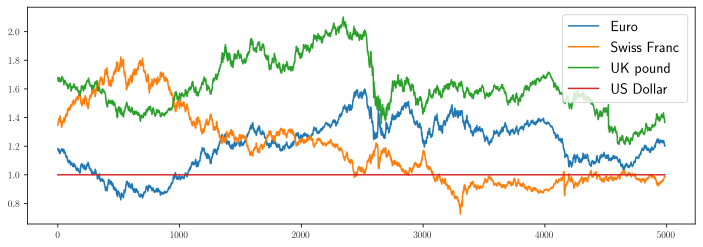

In [12]:
plt.figure(figsize=(12, 4))
legend_size= 15

#plt.plot(australian_dollar, label="Australian Dollar")
#plt.plot(brazilian_real, label="Brazilian Real")
#plt.plot(canadian_dollar, label="Canadian Dollar")
#plt.plot(chinese_yuan, label="Chinese Yuan")
plt.plot(euro, label="Euro")
#plt.plot(indian_rupee, label="Indian Rupee")
#plt.plot(iranian_rial, label="Iranian Rial")
#plt.plot(israeli_sheqel, label="Isreali New Sheqel")
#plt.plot(japanese_yen, label="Japanese Yen")
#plt.plot(korean_won, label="Korean Won")
#plt.plot(malaysian_ringgit, label="Malaysian Ringgit")
#plt.plot(mexican_peso, label="Mexican Peso")
#plt.plot(saudi_arabian_riyal, label="Saudi Arabian Riyal")
#plt.plot(singapore_dollar, label="Singapore Dollar")
#plt.plot(south_african_rand, label="South African Rand")
#plt.plot(swedish_krona, label="Swedish Krona")
plt.plot(swiss_franc, label="Swiss Franc")
#plt.plot(thai_baht, label="Thai Baht")
plt.plot(UK_pound, label="UK pound")
plt.plot(US_dollar, label="US Dollar")

plt.legend(prop={'size': legend_size})
plt.show();

In [13]:
len(US_dollar)

4986

In [34]:
#plot the covariances for the EURO

covariances_ad = []
covariances_emp = []

for index, row in currency_subset_euro_df.iterrows():
    
    z_i = row[['Euro', 'Swiss Franc', 'U.K. Pound Sterling', 'U.S. Dollar']]
    
    mu_i = z_i.mean()
    x_i = np.outer(z_i - mu_i, z_i - mu_i)
    
    covariances_emp.append(x_i)
    covariances_ad.append(x_i[:,0])

In [15]:
covariances_ad = np.array(covariances_ad)

cov_ad_euro = covariances_ad[:,0]
cov_ad_sf = covariances_ad[:,1]
cov_ad_pound = covariances_ad[:,2]
cov_ad_dollar = covariances_ad[:,3]

n_curr = 4

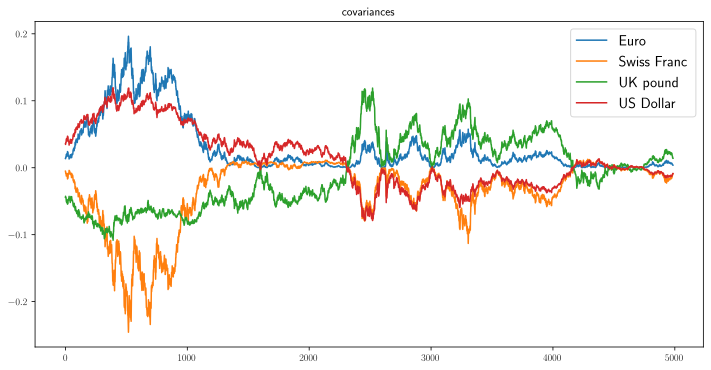

In [16]:
plt.figure(figsize=(12, 6))
legend_size = 15

plt.plot(cov_ad_euro, label="Euro")
plt.plot(cov_ad_sf, label="Swiss Franc")
plt.plot(cov_ad_pound, label="UK pound")
plt.plot(cov_ad_dollar, label="US Dollar")
plt.title("covariances")

plt.legend(prop={'size': legend_size});
plt.show();

# Start calculating

In [70]:
from copy import deepcopy

# specify simple priors
n_0 = 0
Psi_0 = 0.01 * np.eye(n_curr)

n_i = 0
Psi_i = deepcopy(Psi_0)

Psis = []
ns = []
mus = [] #compute the means of the values (instead of their covs) for the GWP later on
current_mu = 0

prev_month = 10

for index, row in currency_subset_euro_df.iterrows():
    
    month = row['Month']

    z_i = row[['Euro', 'Swiss Franc', 'U.K. Pound Sterling', 'U.S. Dollar']]
    
    mu_i = z_i.mean()
    x_i = np.outer(z_i - mu_i, z_i - mu_i)
    x_i = x_i.astype('float')
    #print("x_i: ", x_i)
    
    #reset when new month starts
    if month != prev_month:
        mus.append(current_mu/n_i)
        current_mu = 0
        
        ns.append(max(n_i, n_curr+1))
        #print("Psi: ", Psi_i)
        Psis.append(Psi_i)
        n_i = n_curr
        Psi_i = deepcopy(Psi_0)
        prev_month = month
        
        
    n_i += 1
    #print(np.shape(x_i))
    Psi_i += x_i
    current_mu += z_i

print(len(ns))
print(len(Psis))
print(len(mus))

235
235
235


(235, 4)


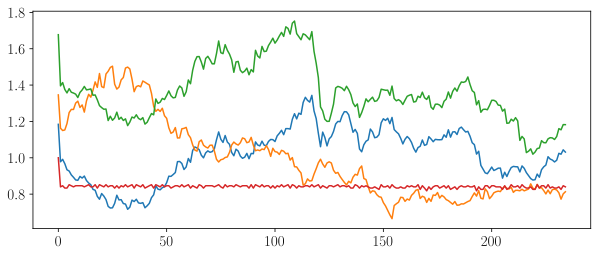

In [71]:
# plot means
print(np.shape(mus))
mus = np.array(mus)

plt.figure(figsize=(10, 4))
plt.plot(mus[:,0])
plt.plot(mus[:,1])
plt.plot(mus[:,2])
plt.plot(mus[:,3])

plt.show();

In [18]:
print(ns[:10])

[5, 25, 26, 24, 24, 27, 26, 25, 26, 26]


In [19]:
print(Psis[:5])

[array([[ 0.02388037, -0.00519623, -0.04424012,  0.03555598],
       [-0.00519623,  0.01194525,  0.01656165, -0.01331067],
       [-0.04424012,  0.01656165,  0.15100401, -0.11332553],
       [ 0.03555598, -0.01331067, -0.11332553,  0.10108022]]), array([[ 0.41370388, -0.24097649, -1.04085312,  0.87812573],
       [-0.24097649,  0.15610573,  0.61392371, -0.51905295],
       [-1.04085312,  0.61392371,  2.71849352, -2.28156411],
       [ 0.87812573, -0.51905295, -2.28156411,  1.93249133]]), array([[ 0.37575261, -0.16815986, -1.04874563,  0.85115288],
       [-0.16815986,  0.09011789,  0.47633036, -0.38828839],
       [-1.04874563,  0.47633036,  3.03028468, -2.44786941],
       [ 0.85115288, -0.38828839, -2.44786941,  1.99500492]]), array([[ 0.39364784, -0.23682442, -0.9724045 ,  0.82558109],
       [-0.23682442,  0.15762032,  0.59593186, -0.50672775],
       [-0.9724045 ,  0.59593186,  2.49202863, -2.10555599],
       [ 0.82558109, -0.50672775, -2.10555599,  1.79670266]]), array([[ 0.6108

In [20]:
# transform all ns and Psis to mus and Sigmas through Laplace Propagation.

from scipy.linalg import expm, sqrtm, logm

def Inv_Wishart_logm_bridge_mu(Psi, v):
    p = np.shape(Psi)[0]
    r = logm(1/(v+p-1) * Psi)
    return(r.reshape(-1))
    
def Inv_Wishart_logm_bridge_Sigma(Psi, v):
    p = np.shape(Psi)[0]
    return(2 * (v+p-1) * np.eye(p**2))

def Inv_Wishart_sqrtm_bridge_mu(Psi, v):
    p = np.shape(Psi)[0]
    r =  sqrtm(1/(v+p)*Psi)
    return(r.reshape(-1))
    
def Inv_Wishart_sqrtm_bridge_Sigma(Psi, v):
    p = np.shape(Psi)[0]
    Psi_inv = np.linalg.inv(Psi)
    Psi_sqrtm = sqrtm(Psi)
    Psi_inv_sqrtm = np.linalg.inv(Psi_sqrtm)
    one = (v+p)**2 * (np.kron(Psi_inv_sqrtm@Psi_inv_sqrtm@Psi_inv_sqrtm, Psi_sqrtm)\
                         + np.kron(Psi_inv, np.eye(p)))

    
    R = np.linalg.inv(one)
    return(R) 


#helper functions
def is_pos_def(x):
    eig = np.linalg.eigvals(x)
    pd = np.all(eig > 0)
    if not pd:
        raise(ValueError("matrix is not positive definite! Matrix: {}; Eigenvalues: {}".format(x, eig)))
    else:
        return(True)

In [21]:
# get individual mus and Sigmas

Y_mu = []
Y_Sigma = []

for i, p_ in enumerate(Psis):
    n_ = ns[i]
    mu_ = Inv_Wishart_sqrtm_bridge_mu(p_, n_)
    Sigma_ = Inv_Wishart_sqrtm_bridge_Sigma(p_, n_)
    Y_mu.append(mu_)
    Y_Sigma.append(Sigma_)
    
print(Y_mu[0])
print(Y_Sigma[0])

[ 0.04094509 -0.00284952 -0.02426051  0.01949828 -0.00284952  0.03440007
  0.00908212 -0.00729934 -0.02426051  0.00908212  0.11065746 -0.06214574
  0.01949828 -0.00729934 -0.06214574  0.08328013]
[[ 2.01680536e-04+0.j  2.07311873e-06+0.j  1.76502993e-05+0.j
  -1.41856222e-05+0.j -5.32603447e-05+0.j -4.51098582e-07+0.j
  -3.84060249e-06+0.j  3.08670891e-06+0.j -4.53452573e-04+0.j
  -3.84060249e-06+0.j -3.26984569e-05+0.j  2.62798918e-05+0.j
   3.64441803e-04+0.j  3.08670891e-06+0.j  2.62798918e-05+0.j
  -2.11212633e-05+0.j]
 [ 2.07311873e-06+0.j  2.06442243e-04+0.j -6.60753257e-06+0.j
   5.31050264e-06+0.j -4.51098582e-07+0.j -5.42964645e-05+0.j
   1.43776067e-06+0.j -1.15553449e-06+0.j -3.84060249e-06+0.j
  -4.62273980e-04+0.j  1.22409323e-05+0.j -9.83809048e-06+0.j
   3.08670891e-06+0.j  3.71531606e-04+0.j -9.83809048e-06+0.j
   7.90691606e-06+0.j]
 [ 1.76502993e-05+0.j -6.60753257e-06+0.j  1.50962544e-04+0.j
   4.52130210e-05+0.j -3.84060249e-06+0.j  1.43776067e-06+0.j
  -4.22244046e

In [22]:
# Prepare the X data

T = np.arange(1, len(Y_mu)+1)
V = np.arange(1, n_curr + 1)

X = []
for t in T:
    for v1 in V:
        for v2 in V:
            X.append([t, v1, v2])

X = np.array(X)            
print(X[:25])

[[1 1 1]
 [1 1 2]
 [1 1 3]
 [1 1 4]
 [1 2 1]
 [1 2 2]
 [1 2 3]
 [1 2 4]
 [1 3 1]
 [1 3 2]
 [1 3 3]
 [1 3 4]
 [1 4 1]
 [1 4 2]
 [1 4 3]
 [1 4 4]
 [2 1 1]
 [2 1 2]
 [2 1 3]
 [2 1 4]
 [2 2 1]
 [2 2 2]
 [2 2 3]
 [2 2 4]
 [2 3 1]]


(3760, 3760)


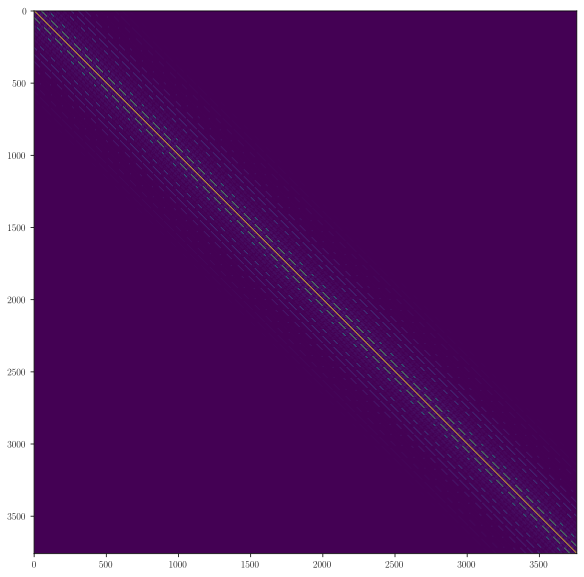

In [23]:
# build the kernel

def k_SEK(x, x_, s=1, l=3):
    return(s*np.exp(-(x-x_)**2 / (2*l**2)))

def k_RQ(x, x_, s=1, l=10, a=0.1):
    return(s**2 * (1 + (x-x_)**2/(2*a*l**2)))**(-a)

def k_OU(x, x_, s=1, l=9):
    return(s**2 * np.exp(-(np.abs(x-x_)/l)))
    
def k_dirac_soft(x, x_):
    if x == x_:
        return(1)
    else:
        return(0.1)
    
n = len(X)
K_XX = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        t_i = X[i,0]
        v1_i = X[i,1]
        v2_i = X[i,2]
        t_j = X[j,0]
        v1_j = X[j,1]
        v2_j = X[j,2]
        K_XX[i, j] = k_OU(t_i, t_j) * k_dirac_soft(v1_i, v1_j) * k_dirac_soft(v2_i, v2_j)

K_XX += 10e-6*np.eye(n) #for numerical issues
        
print(np.shape(K_XX))

plt.figure(figsize=(10,10))
plt.imshow(K_XX)
plt.show();

In [24]:
# prep Y data block

Y_Sigma_block = np.zeros((n,n))
idx = 0
for S in Y_Sigma:
    Y_Sigma_block[idx:idx+n_curr**2, idx:idx+(n_curr**2)] = S
    idx += n_curr**2

/home/marius/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


In [25]:
print(is_pos_def(K_XX))
print(is_pos_def(Y_Sigma_block))

True
True


In [26]:
# calculate GP stuff
from numpy.random import randn, multivariate_normal
from numpy.linalg import cholesky, solve
from scipy.linalg import cho_solve, cho_factor

G_ = K_XX + Y_Sigma_block
G = cho_factor(G_)

(3760, 3)
[[1. 1. 1.]
 [1. 1. 2.]
 [1. 1. 3.]
 [1. 1. 4.]
 [1. 2. 1.]
 [1. 2. 2.]
 [1. 2. 3.]
 [1. 2. 4.]
 [1. 3. 1.]
 [1. 3. 2.]
 [1. 3. 3.]
 [1. 3. 4.]
 [1. 4. 1.]
 [1. 4. 2.]
 [1. 4. 3.]
 [1. 4. 4.]
 [2. 1. 1.]
 [2. 1. 2.]
 [2. 1. 3.]
 [2. 1. 4.]
 [2. 2. 1.]
 [2. 2. 2.]
 [2. 2. 3.]
 [2. 2. 4.]
 [2. 3. 1.]
 [2. 3. 2.]
 [2. 3. 3.]
 [2. 3. 4.]
 [2. 4. 1.]
 [2. 4. 2.]]
(3760, 3760)
(3760, 3760)


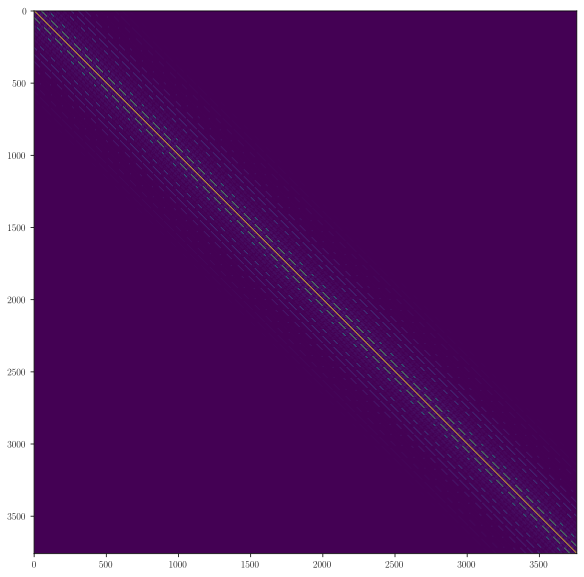

In [27]:
# create x, K_xx, K_xX

T_x = np.arange(1, 235+1) #just take the exact same range again

x = np.zeros((len(T_x) * len(V)**2, 3))
print(np.shape(x))
idx = 0
for t in T_x:
    for v1 in V:
        for v2 in V:
            x[idx] = [t, v1, v2]
            idx += 1
            
print(x[:30])

n_ = len(x)
K_xX = np.zeros((n_, n))
for i in range(n_):
    for j in range(n):
        t_i = x[i,0]
        v1_i = x[i,1]
        v2_i = x[i,2]
        t_j = X[j,0]
        v1_j = X[j,1]
        v2_j = X[j,2]
        K_xX[i, j] = k_OU(t_i, t_j) * k_dirac_soft(v1_i, v1_j) * k_dirac_soft(v2_i, v2_j)
        
print(np.shape(K_xX))

K_xx = np.zeros((n_, n_))
for i in range(n_):
    for j in range(n_):
        t_i = x[i,0]
        v1_i = x[i,1]
        v2_i = x[i,2]
        t_j = x[j,0]
        v1_j = x[j,1]
        v2_j = x[j,2]
        K_xx[i, j] = k_OU(t_i, t_j, s=1.002) * k_dirac_soft(v1_i, v1_j) * k_dirac_soft(v2_i, v2_j)


K_xx += np.eye(n_) * 1e-6

print(np.shape(K_xx))
plt.figure(figsize=(10,10))
plt.imshow(K_xx)
plt.show();

In [28]:
# do some inference
A = cho_solve(G, K_xX.T).T

Y_mu = np.array(Y_mu).reshape(-1)

out = {}

n_GP_samples = 50

# # posterior p(f_x|Y) = N(f_x,mpost,vpost)
out["mpost"] = A @ Y_mu #m(x) + A @ (Y - mX)  # mean
out["vpost"] = K_xx - A @ K_xX.T  # covariance
out["spost"] = multivariate_normal(
    out["mpost"].flatten(), out["vpost"], size=n_GP_samples
).T

In [29]:
print(np.shape(out["mpost"]))
print(np.shape(out["vpost"]))
print(np.shape(out["spost"]))

(3760,)
(3760, 3760)
(3760, 50)


In [30]:
# transform back and have a look

test_m = out["mpost"].reshape(-1, n_curr, n_curr)
matrices_back = []
for y in test_m:
    y_sqr = y@y.T + np.eye(n_curr) * 10e-8
    is_pos_def(y_sqr)
    matrices_back.append(y_sqr)
    
test_v = out["vpost"].diagonal().reshape(-1, n_curr, n_curr)
variances_back = []
for v in test_v:
    v_sqr = v@v.T + np.eye(n_curr) * 10e-8
    is_pos_def(v_sqr)
    variances_back.append(v_sqr)

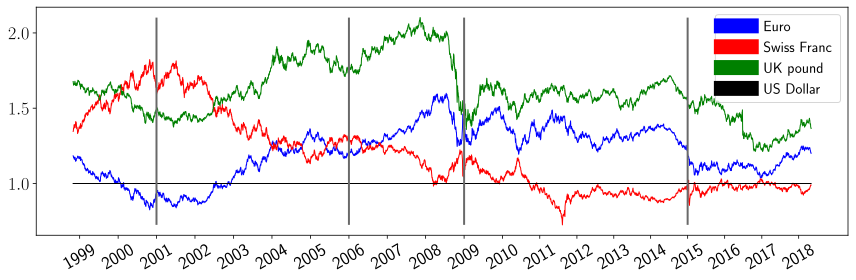

In [31]:
# plot the results

plt.figure(figsize=(12,4))
plt.rc('text', usetex=True)
plt.rc('ytick', labelsize=18)
plt.rc('xtick', labelsize=18)
plt.rc('axes', labelsize=18)

lw = 1
legend_size = 15

plt.plot(euro, label="Euro", color='blue', lw=lw)
plt.plot(swiss_franc, label="Swiss Franc", color='red', lw=lw)
plt.plot(UK_pound, label="UK pound", color='green', lw=lw)
plt.plot(US_dollar, label="US Dollar", color='black', lw=lw)

y_min, y_max= 0.05, 0.95
# 2001
plt.axvline(year_idxs[1:][2], ymin=y_min, ymax=y_max, color='dimgrey', lw=2)
# 2006
plt.axvline(year_idxs[1:][7], ymin=y_min, ymax=y_max, color='dimgrey', lw=2)
# 2009
plt.axvline(year_idxs[1:][10], ymin=y_min, ymax=y_max, color='dimgrey', lw=2)
# 2015
plt.axvline(year_idxs[1:][16], ymin=y_min, ymax=y_max, color='dimgrey', lw=2)

plt.xticks(year_idxs[1:], year_labels[1:], rotation=30)

leg = plt.legend(prop={'size': legend_size}) 
# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(15.0)

plt.tight_layout()
plt.savefig('currencies.pdf')
plt.show();

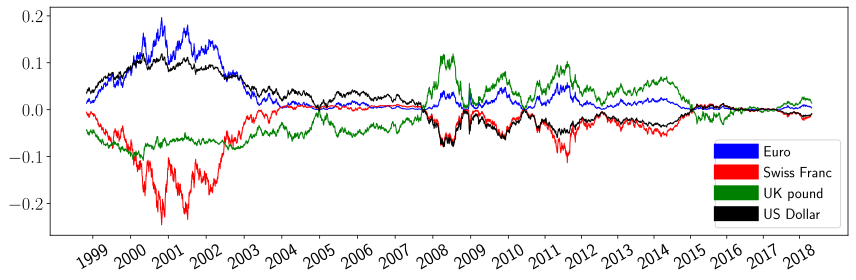

In [32]:
# plot the results

plt.figure(figsize=(12,4))
plt.rc('text', usetex=True)
plt.rc('ytick', labelsize=18)
plt.rc('xtick', labelsize=18)
plt.rc('axes', labelsize=18)

lw = 1
legend_size = 15


plt.plot(cov_ad_euro, label="Euro", color='blue', lw=lw)
plt.plot(cov_ad_sf, label="Swiss Franc", color='red', lw=lw)
plt.plot(cov_ad_pound, label="UK pound", color='green', lw=lw)
plt.plot(cov_ad_dollar, label="US Dollar", color='black', lw=lw)

plt.xticks(year_idxs[1:], year_labels[1:], rotation=30)

leg = plt.legend(prop={'size': legend_size}) 
# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(15.0)

plt.tight_layout()
plt.savefig('currency_covariances.pdf')
plt.show();

In [36]:
print(covariances_emp[0])

[[0.013880374225 -0.005196230575000007 -0.044240121575 0.035555977925]
 [-0.005196230575000007 0.0019452510250000054 0.01656164802500002
  -0.01331066847500002]
 [-0.044240121575 0.01656164802500002 0.141004005025 -0.113325531475]
 [0.035555977925 -0.01331066847500002 -0.113325531475 0.09108022202500002]]


(4986, 4, 4)


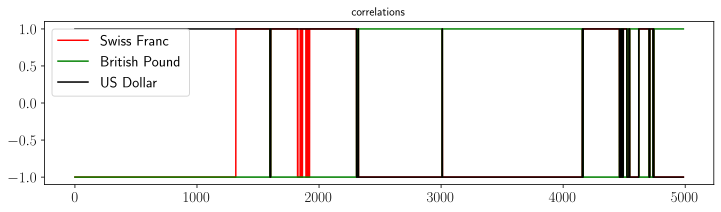

In [106]:
# plot empirical correlations
print(np.shape(covariances_emp))
covariances_emp = np.array(covariances_emp).astype(float)
corr_emp = np.zeros_like(covariances_emp)

# compute empirical covariances
cov_emp_euro = covariances_emp[:,0,0]
cov_emp_sf = covariances_emp[:,0,1]
cov_emp_bp = covariances_emp[:,0,2]
cov_emp_usd = covariances_emp[:,0,3]

# compute the empirical correlations from the empirical covariances in a smart numpy way
for i in range(np.shape(covariances_emp)[-1]):
    for j in range(np.shape(covariances_emp)[-1]):
        corr_emp[:, i, j] = covariances_emp[:,i,j] / (np.sqrt(covariances_emp[:,i,i]) * np.sqrt(covariances_emp[:,j,j]))
        

# plot the results and compare with above
corr_emp_euro = corr_emp[:,0,0]
corr_emp_sf = corr_emp[:,0,1]
corr_emp_bp = corr_emp[:,0,2]
corr_emp_usd = corr_emp[:,0,3]

plt.figure(figsize=(12, 3))
legend_size = 15

#plt.plot(corr_emp_euro, label="emp_0")
plt.plot(corr_emp_sf, label="Swiss Franc", color='red')
plt.plot(corr_emp_bp, label="British Pound", color='green')
plt.plot(corr_emp_usd, label="US Dollar", color='black')
plt.title("correlations")

plt.legend(prop={'size': legend_size});
plt.show();

(235, 4, 4)


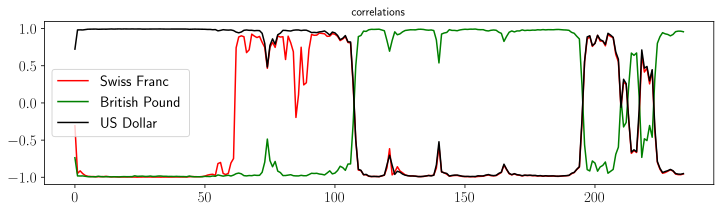

In [42]:
# plot empirical correlations from the Psis instead of every day
print(np.shape(Psis))
Psis_emp = np.array(Psis)#.astype(float)
corr_emp = np.zeros_like(Psis_emp)

# compute the empirical correlations from the empirical covariances in a smart numpy way
for i in range(np.shape(Psis_emp)[-1]):
    for j in range(np.shape(Psis_emp)[-1]):
        corr_emp[:, i, j] = Psis_emp[:,i,j] / (np.sqrt(Psis_emp[:,i,i]) * np.sqrt(Psis_emp[:,j,j]))
        

# plot the results and compare with above
corr_emp_euro = corr_emp[:,0,0]
corr_emp_sf = corr_emp[:,0,1]
corr_emp_bp = corr_emp[:,0,2]
corr_emp_usd = corr_emp[:,0,3]

plt.figure(figsize=(12, 3))
legend_size = 15

#plt.plot(corr_emp_euro, label="emp_0")
plt.plot(corr_emp_sf, label="Swiss Franc", color='red')
plt.plot(corr_emp_bp, label="British Pound", color='green')
plt.plot(corr_emp_usd, label="US Dollar", color='black')
plt.title("correlations")

plt.legend(prop={'size': legend_size});
plt.show();

In [43]:
matrices_back = np.array(matrices_back)
x1 = matrices_back[:,0,0]
x2 = matrices_back[:,0,1]
x3 = matrices_back[:,0,2]
x4 = matrices_back[:,0,3]

variances_back = np.array(variances_back)
v1 = np.sqrt(variances_back[:,0,0])
v2 = np.sqrt(variances_back[:,0,1])
v3 = np.sqrt(variances_back[:,0,2])
v4 = np.sqrt(variances_back[:,0,3])

In [44]:
# show the covariances at specific points in time

# 2001
cov_2001 = matrices_back[2 + 2*12]
cov_2006 = matrices_back[2 + 7*12]
cov_2009 = matrices_back[2 + 10*12]
cov_2015 = matrices_back[2 + 16*12]

<Figure size 864x288 with 0 Axes>

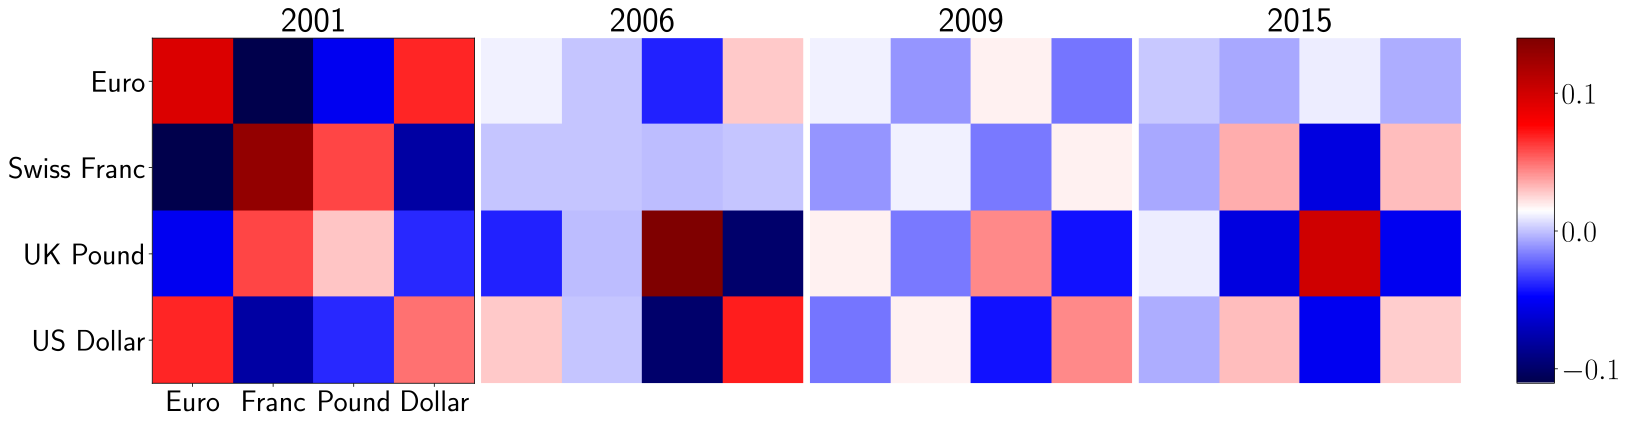

In [45]:
# plot the four matrices as heatmaps

plt.figure(figsize=(12,4))
plt.rc('text', usetex=True)
plt.rc('ytick', labelsize=30)
plt.rc('xtick', labelsize=30)
plt.rc('axes', labelsize=30)

title_size=35


titles = ['2001', '2006', '2009', '2015']

ticks = [0, 1, 2, 3]
ylabels = ['Euro', 'Swiss Franc', 'UK Pound', 'US Dollar']
xlabels = ['Euro', 'Franc', 'Pound', 'Dollar']

fig, axs = plt.subplots(nrows=1, ncols=4, sharex=False, figsize=(26,6))
covs = [cov_2001, cov_2006, cov_2009, cov_2015]


v_min = np.array(covs).min()
v_max = np.array(covs).max()

for i, ax in enumerate(axs.flat):
    if i == 0:
        #label the axis
        ax.set_yticks(ticks)
        ax.set_yticklabels(ylabels)
        ax.set_xticks(ticks)
        ax.set_xticklabels(xlabels)
    else:
        ax.set_axis_off()
        
    ax.set_title(titles[i], size=title_size)
    im = ax.imshow(covs[i], vmin=v_min, vmax=v_max, aspect='auto', cmap='seismic') #RdGy, bwr, RdBu, coolwarm, seismic
    
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.02, hspace=0.02)

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax)

# plt.tight_layout() don't use tight_layout here.
plt.savefig('selected_covs.pdf', bbox_inches='tight')
plt.show();

In [46]:
cov_samples = out["spost"]
print(np.shape(cov_samples))

cov_samples = np.swapaxes(cov_samples, 0, 1)
cov_samples = cov_samples.reshape(n_GP_samples, -1, n_curr, n_curr,)
print(np.shape(cov_samples))

cov_samples_sqr = np.zeros_like(cov_samples)
for i in range(n_GP_samples):
    for j in range(cov_samples.shape[1]):
        X_ = cov_samples[i, j, :, :]
        X_2 =  X_ @ X_.T 
        is_pos_def(X_2)
        cov_samples_sqr[i, j, :, :] = X_2

print(np.shape(cov_samples_sqr))
print(cov_samples_sqr[-1, -1, :, :])

(3760, 50)
(50, 235, 4, 4)
(50, 235, 4, 4)
[[ 0.00815697  0.01229047 -0.01048733  0.00960798]
 [ 0.01229047  0.03727299 -0.02617833  0.01454769]
 [-0.01048733 -0.02617833  0.04192431 -0.01704178]
 [ 0.00960798  0.01454769 -0.01704178  0.01334411]]


In [47]:
# draw 4 samples per year and plot them 

cov_samples_2001 = cov_samples_sqr[:4, 2 + 2*12, : ,:]
cov_samples_2006 = cov_samples_sqr[:4, 2 + 7*12, : ,:]
cov_samples_2009 = cov_samples_sqr[:4, 2 + 10*12, : ,:]
cov_samples_2015 = cov_samples_sqr[:4, 2 + 16*12, : ,:]
print(cov_samples_2001.shape)
print(v_min, v_max)

(4, 4, 4)
-0.1105009900835692 0.13996577972828528


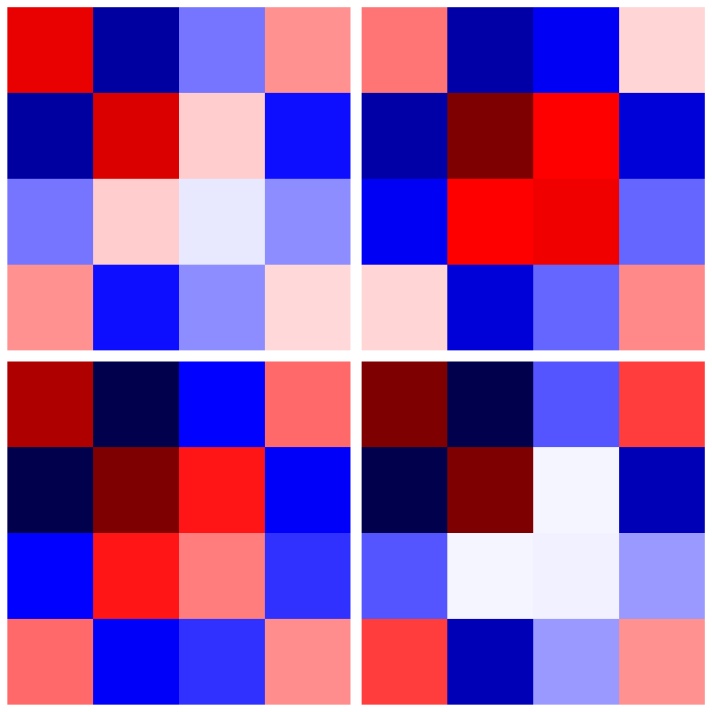

In [48]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False, figsize=(10, 10))

for i, ax in enumerate(axs.flat):
    ax.set_axis_off()
        
    #print(cov_samples_2001[i])
    im = ax.imshow(cov_samples_2001[i], vmin=v_min, vmax=v_max, aspect='auto', cmap='seismic')

plt.tight_layout()
plt.savefig('selected_cos_samples_2001.pdf')

plt.show();

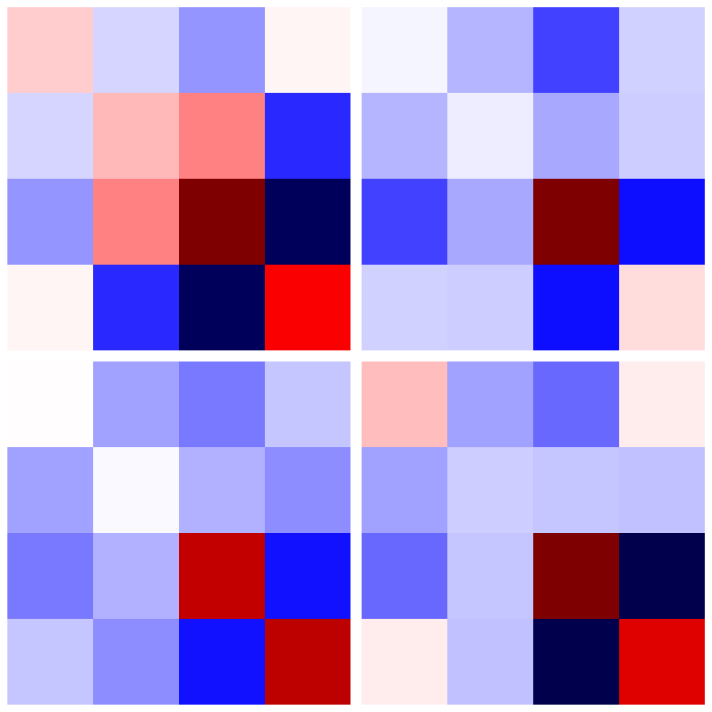

In [49]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False, figsize=(10, 10))

for i, ax in enumerate(axs.flat):
    ax.set_axis_off()

    im = ax.imshow(cov_samples_2006[i], vmin=v_min, vmax=v_max, aspect='auto', cmap='seismic')

plt.tight_layout()
plt.savefig('selected_cos_samples_2006.pdf')

plt.show();

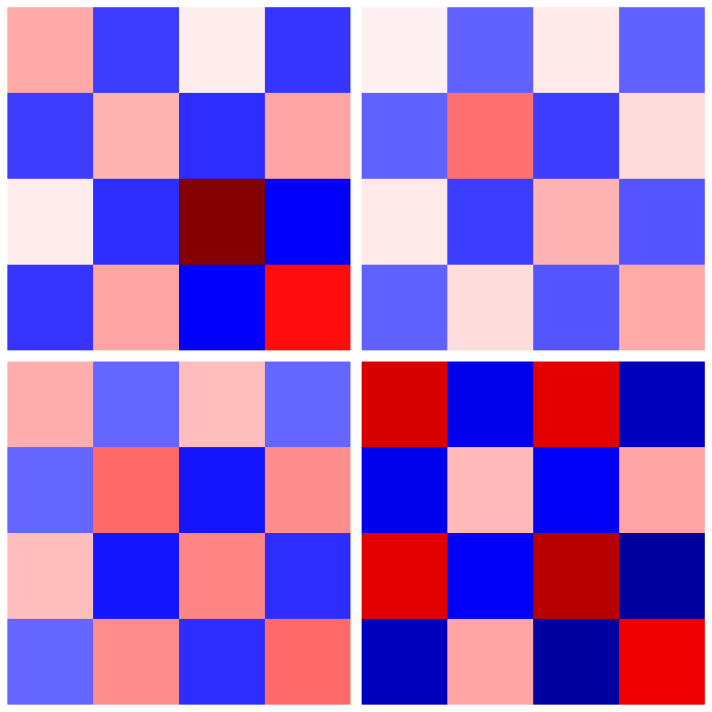

In [50]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False, figsize=(10, 10))

for i, ax in enumerate(axs.flat):
    ax.set_axis_off()

    im = ax.imshow(cov_samples_2009[i], vmin=v_min, vmax=v_max, aspect='auto', cmap='seismic')

plt.tight_layout()
plt.savefig('selected_cos_samples_2009.pdf')

plt.show();

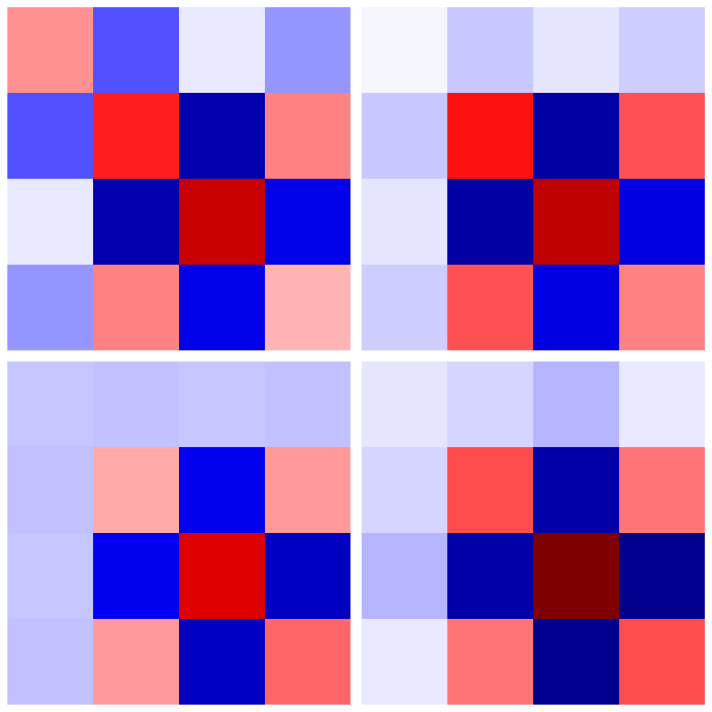

In [51]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False, figsize=(10, 10))

for i, ax in enumerate(axs.flat):
    ax.set_axis_off()
    
    im = ax.imshow(cov_samples_2015[i], vmin=v_min, vmax=v_max, aspect='auto', cmap='seismic')

plt.tight_layout()
plt.savefig('selected_cos_samples_2015.pdf')

plt.show();

In [52]:
year_months_idxs = np.arange(0+2, 235+12+2, 12)

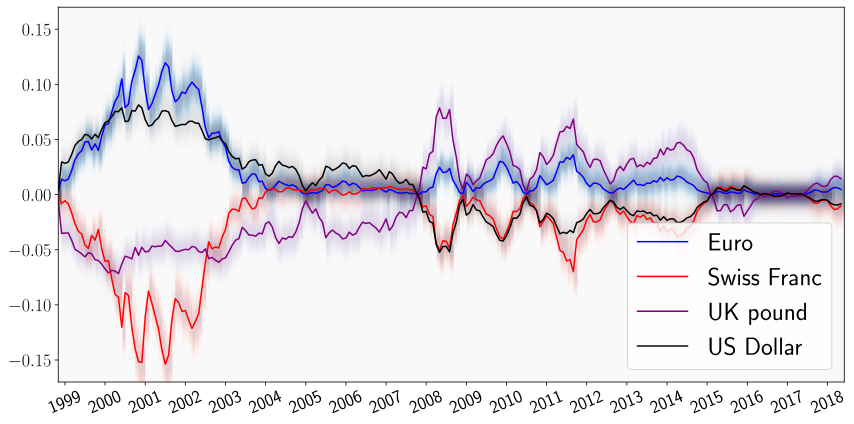

In [53]:
# plot Gaussians

plt.figure(figsize=(12,6))
plt.rc('text', usetex=True)
plt.rc('ytick', labelsize=18)
plt.rc('xtick', labelsize=18)
plt.rc('axes', labelsize=18)


plt.plot(x1, label="Euro", color='blue')
plt.plot(x2, label="Swiss Franc", color='red')
plt.plot(x3, label="UK pound", color='purple')
plt.plot(x4, label="US Dollar", color='black')

plt.xticks(year_months_idxs, year_labels[1:], rotation = 23)

margin = 0.17

def GaussPDFscaled(y, m, s):  # shading
    return np.exp(-0.5 * (y - m.T) ** 2 / (s ** 2).T)


yy = np.linspace(-margin, margin, 1000).reshape([1000, 1])

Ppost1 = GaussPDFscaled(
    yy, x1, v1
)  # shading by local marginal pdf

Ppost2 = GaussPDFscaled(
    yy, x2, v2
)  # shading by local marginal pdf

Ppost3 = GaussPDFscaled(
    yy, x3, v3
)  # shading by local marginal pdf

Ppost4 = GaussPDFscaled(
    yy, x4, v4
)  # shading by local marginal pdf

plt.imshow(
    Ppost1,
    extent=[0, 235, -margin, margin],
    aspect="auto",
    origin="lower",
    cmap="Blues",
    alpha=0.8,
)

plt.imshow(
    Ppost2,
    extent=[0, 235, -margin, margin],
    aspect="auto",
    origin="lower",
    cmap="Reds",
    alpha=0.5,
)


plt.imshow(
    Ppost3,
    extent=[0, 235, -margin, margin],
    aspect="auto",
    origin="lower",
    cmap="Purples",
    alpha=0.4,
)

plt.imshow(
    Ppost4,
    extent=[0, 235, -margin, margin],
    aspect="auto",
    origin="lower",
    cmap="Greys",
    alpha=0.3,
)



plt.legend(prop={'size': 25})
plt.tight_layout()
plt.savefig('currency_covariances_GP.pdf')
plt.show();

## Plot the correlation coefficients for the Swiss Franc, the UK Pound and the US Dollar with the EURO for many samples

In [54]:
print(cov_samples_sqr[-1, -1, :, :])

#calculate the correlation coefficients for all matrices
corr_samples = np.zeros_like(cov_samples_sqr)
for i in range(n_curr):
    for j in range(n_curr):
        corr_samples[:, :, i, j] = cov_samples_sqr[:, :, i, j]/(np.sqrt(cov_samples_sqr[:, :, i, i] * cov_samples_sqr[:, :, j, j]))

print(corr_samples[-1, -1, :, :])

#choose only the first row correlations (without the correlation for the Euro itself)
corr_samples_euro = np.zeros((n_GP_samples, corr_samples.shape[1], n_curr-1))
corr_samples_euro = corr_samples[:, :, 0, 1:n_curr]
corr_samples_euro_mean = corr_samples_euro.mean(0)
corr_samples_euro_std = corr_samples_euro.std(0)

corr_samples_euro_mean_sf = corr_samples_euro_mean[:,0]
corr_samples_euro_mean_bp = corr_samples_euro_mean[:,1]
corr_samples_euro_mean_usd = corr_samples_euro_mean[:,2]

corr_samples_euro_std_sf = corr_samples_euro_std[:,0]
corr_samples_euro_std_bp = corr_samples_euro_std[:,1]
corr_samples_euro_std_usd = corr_samples_euro_std[:,2]

[[ 0.00815697  0.01229047 -0.01048733  0.00960798]
 [ 0.01229047  0.03727299 -0.02617833  0.01454769]
 [-0.01048733 -0.02617833  0.04192431 -0.01704178]
 [ 0.00960798  0.01454769 -0.01704178  0.01334411]]
[[ 1.          0.70486661 -0.56711056  0.92092228]
 [ 0.70486661  1.         -0.6622346   0.65230707]
 [-0.56711056 -0.6622346   1.         -0.72050555]
 [ 0.92092228  0.65230707 -0.72050555  1.        ]]


In [55]:
corr_samples_euro_sf = corr_samples_euro[:,:,0]
corr_samples_euro_bp = corr_samples_euro[:,:,1]
corr_samples_euro_usd = corr_samples_euro[:,:,2]

x = range(0, 235)

(50, 235)


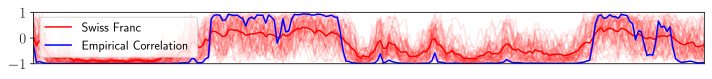

In [59]:
# plot the correlations for Swiss Franc

plt.figure(figsize=(10, 1.2))
plt.rc('text', usetex=True)
plt.rc('ytick', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('axes', labelsize=15)

legend_size=13

print(corr_samples_euro_sf.shape)
for s in corr_samples_euro_sf:
    plt.plot(x, s, alpha=0.1, color='red');

plt.plot(x, corr_samples_euro_mean_sf, alpha=1, color='red', label='Swiss Franc') 
plt.xticks([])
plt.ylim(-1,1)
plt.margins(0,0)

#plot empirical correlations in blue
plt.plot(corr_emp_sf, label="Empirical Correlation", color='blue')

plt.legend(prop={'size': legend_size})
plt.tight_layout()
plt.savefig('currency_corr_samples_SF.pdf')
plt.show();

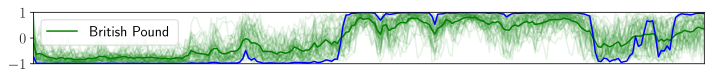

In [60]:
# plot for British Pound

plt.figure(figsize=(10, 1.2))
plt.rc('text', usetex=True)
plt.rc('ytick', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('axes', labelsize=15)

legend_size=15


for s in corr_samples_euro_bp:
    plt.plot(x, s, alpha=0.1, color='green');

plt.plot(x, corr_samples_euro_mean_bp, alpha=1, color='green', label='British Pound') 
plt.xticks([])
plt.ylim(-1,1)
plt.margins(0,0)

# compare to empirical correlation in blue
plt.plot(corr_emp_bp, color='blue')

plt.legend(prop={'size': legend_size})
plt.tight_layout()
plt.savefig('currency_corr_samples_BP.pdf')
plt.show();

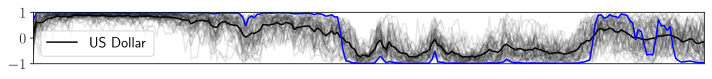

In [61]:
# plot for US Dollar

plt.figure(figsize=(10, 1.2))
plt.rc('text', usetex=True)
plt.rc('ytick', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('axes', labelsize=15)

legend_size=15

for s in corr_samples_euro_usd:
    plt.plot(x, s, alpha=0.1, color='black');

plt.plot(x, corr_samples_euro_mean_usd, alpha=1, color='black', label='US Dollar') 
plt.xticks([])
plt.ylim(-1,1)
plt.margins(0,0)

#compare to empirical correlation in blue
plt.plot(corr_emp_usd, color='blue')

plt.legend(prop={'size': legend_size})
plt.tight_layout()
plt.savefig('currency_corr_samples_USD.pdf')
plt.show();

# Compare to Generalized Wishart Process

In [62]:
from gwp import GeneralizedWishartProcess as GWP
#from model.kernels import squared_exponential as se
from kernels import ou 

(4, 50)


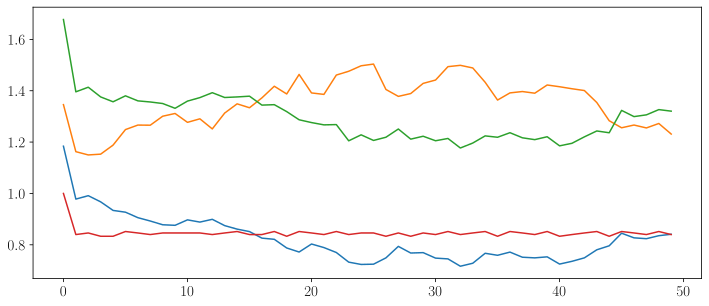

In [102]:
# playing around

N_train = 50

train_data = mus.T[:, 0:N_train] #235
print(np.shape(train_data))

plt.figure(figsize=(12, 5))
for i in range(np.shape(train_data)[0]):
    plt.plot(train_data[i, :])
    
plt.show();

In [118]:
# prepare the empirical comparisons for later

cov_emp_train = []
for z_i in train_data.T:
    
    mu_i = z_i.mean()
    x_i = np.outer((z_i - mu_i), (z_i - mu_i))
    cov_emp_train.append(x_i)
    
cov_emp_train = np.array(cov_emp_train).astype(float)
print(np.shape(cov_emp_train))

(50, 4, 4)


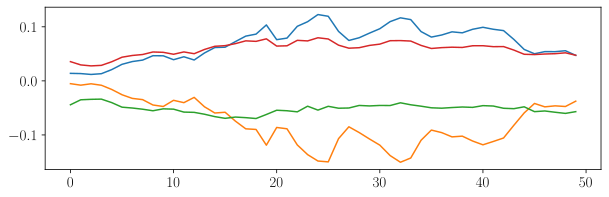

In [134]:
# plot empirical covariance of training samples
cov_samples_emp_0 = cov_emp_train[:,0,0]
cov_samples_emp_1 = cov_emp_train[:,0,1]
cov_samples_emp_2 = cov_emp_train[:,0,2]
cov_samples_emp_3 = cov_emp_train[:,0,3]

plt.figure(figsize=(10, 3))

plt.plot(cov_samples_emp_0)
plt.plot(cov_samples_emp_1)
plt.plot(cov_samples_emp_2)
plt.plot(cov_samples_emp_3)

plt.show();

(50, 4, 4)


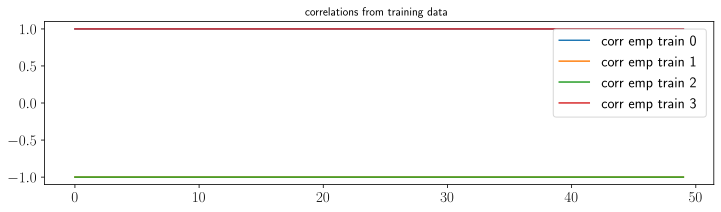

In [121]:
# plot empirical correlation of training samples

print(np.shape(cov_emp_train))
corr_emp_train = np.zeros_like(cov_emp_train)

# compute the empirical correlations from the empirical covariances in a smart numpy way
for i in range(np.shape(cov_emp_train)[-1]):
    for j in range(np.shape(cov_emp_train)[-1]):
        corr_emp_train[:, i, j] = cov_emp_train[:,i,j] / (np.sqrt(cov_emp_train[:,i,i]) * np.sqrt(cov_emp_train[:,j,j]))
        

# plot the results and compare with above
corr_emp_train_0 = corr_emp_train[:,0,0]
corr_emp_train_1 = corr_emp_train[:,0,1]
corr_emp_train_2 = corr_emp_train[:,0,2]
corr_emp_train_3 = corr_emp_train[:,0,3]

plt.figure(figsize=(12, 3))
legend_size = 15

plt.plot(corr_emp_train_0, label="corr emp train 0")
plt.plot(corr_emp_train_1, label="corr emp train 1")
plt.plot(corr_emp_train_2, label="corr emp train 2")
plt.plot(corr_emp_train_3, label="corr emp train 3")
plt.title("correlations from training data")

plt.legend(prop={'size': legend_size});
plt.show();

In [103]:
# train the Generalized Wishart Process

gwp = GWP(0.95, ou, 0.0, 1.0, 1.0)
samples, diagnostics = gwp.fit(train_data, numit=1000, progress=100)

/home/marius/Desktop/Laplace_Matching_for_GLMs/Wishart_experiment/gwp.py:243: RuntimeWarning: covariance is not positive-semidefinite.
  draw = np.random.multivariate_normal(np.zeros(K.shape[0]), K)
/home/marius/Desktop/Laplace_Matching_for_GLMs/Wishart_experiment/gwp.py:146: RuntimeWarning: covariance is not positive-semidefinite.
  ellipse = np.random.multivariate_normal(np.zeros(K.shape[0]), K)


Iter 0: loglik = -318.85, log P(u|...) = -1198.90, log P(tau|...) = -1076.95, log P(L|...) = -133.51
Iter 100: loglik = -9.29, log P(u|...) = -525.88, log P(tau|...) = -562.63, log P(L|...) = -26.71
Iter 200: loglik = -10.42, log P(u|...) = -534.79, log P(tau|...) = -570.66, log P(L|...) = -25.19
Iter 300: loglik = -11.64, log P(u|...) = -523.73, log P(tau|...) = -558.20, log P(L|...) = -24.79
Iter 400: loglik = -7.44, log P(u|...) = -503.43, log P(tau|...) = -541.24, log P(L|...) = -19.68
Iter 500: loglik = -9.90, log P(u|...) = -508.28, log P(tau|...) = -544.10, log P(L|...) = -23.17
Iter 600: loglik = -11.54, log P(u|...) = -564.70, log P(tau|...) = -599.16, log P(L|...) = -23.90
Iter 700: loglik = -6.28, log P(u|...) = -537.73, log P(tau|...) = -576.90, log P(L|...) = -22.02
Iter 800: loglik = -9.33, log P(u|...) = -547.70, log P(tau|...) = -583.45, log P(L|...) = -24.22
Iter 900: loglik = -7.62, log P(u|...) = -530.36, log P(tau|...) = -561.35, log P(L|...) = -20.73
Optimal likeli

In [130]:
# compute the covariance matrices for the last 100 samples

num_samples = 100

samples_test = np.array(samples)
u_vector_samples = samples_test[-num_samples: , 0]
L_matrix_samples = samples_test[-num_samples: , 2]
print(np.shape(u_vector_samples))
print(np.shape(L_matrix_samples))

# Sigma(t) = sum_i^nu L u_i(t) u_i(t)^T L^T  ~ W(V, nu)

u_vector_samples = np.concatenate(u_vector_samples)
u_vector_samples = u_vector_samples.reshape(num_samples, N_train, -1, np.shape(L_matrix_samples[0])[0])

cov_matrices_samples = []

for i in range(num_samples):
    u_vector = u_vector_samples[i]
    L_matrix = L_matrix_samples[i]
    cov_matrices_s = []
    for u_t in u_vector:
        cov_prelim = []
        for u_i in u_t:
            #print(np.shape(u_i))
            c_ = np.outer((L_matrix @ u_i), (u_i @ L_matrix.T))
            #print("c_: ", np.shape(c_))
            cov_prelim.append(c_)
        cov_matrices_s.append(np.sum(np.array(cov_prelim), axis=0))
        
        #invert because it's supposed to be an Inverse Wishart Process???
        #TODO: cholesky decomposition
        #C = np.linalg.inv(np.sum(np.array(cov_prelim), axis=0))
        #cov_matrices_s.append(C)
    
    #print(np.shape(cov_matrices_s))
    cov_matrices_samples.append(np.array(cov_matrices_s))
    
print(np.shape(cov_matrices_samples))

(100,)
(100,)
(100, 50, 4, 4)


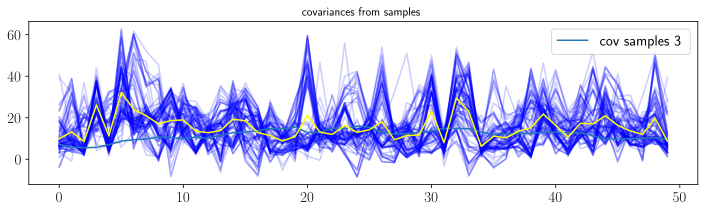

In [139]:
# plot the covariances
cov_matrices_samples = np.array(cov_matrices_samples)

cov_samples_1 = cov_matrices_samples[:,:,0,1]
cov_samples_2 = cov_matrices_samples[:,:,0,2]
cov_samples_3 = cov_matrices_samples[:,:,0,3]

cov_samples_1_mean = np.mean(cov_samples_1, 0)
cov_samples_2_mean = np.mean(cov_samples_2, 0)
cov_samples_3_mean = np.mean(cov_samples_3, 0)

plt.figure(figsize=(12, 3))
legend_size = 15

for i in range(num_samples):
    #plt.plot(cov_samples_1[i], color ='blue', alpha=0.2)#, label="sample_1")
    #plt.plot(cov_samples_2[i], color ='blue', alpha=0.2)#, label="sample_2")
    plt.plot(cov_samples_3[i], color ='blue', alpha=0.2)#, label="sample_3")
plt.title("covariances from samples")

# plot mean 

# compare to empirical correlation
#plt.plot(cov_samples_emp_0 * 200, label='cov samples 0')
#plt.plot(cov_samples_emp_1 * 200, label='cov samples 1')
#plt.plot(cov_samples_emp_2 * 200, label='cov samples 2')
#plt.plot(cov_samples_emp_3 * 200, label='cov samples 3')
#plt.plot(cov_samples_1_mean, color='yellow')
#plt.plot(cov_samples_2_mean, color='yellow')
plt.plot(cov_samples_3_mean, color='yellow')

plt.legend(prop={'size': legend_size});
plt.show();

(100, 50, 4, 4)
(100, 50, 4, 4)


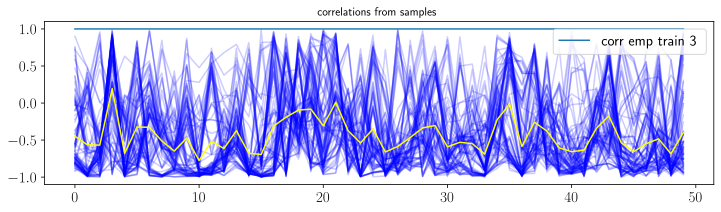

In [129]:
# plot correlations from last 100 samples

# plot sample correlations
cov_matrices_samples = np.array(cov_matrices_samples)
print(np.shape(cov_matrices_samples))
corr_samples = np.zeros_like(cov_matrices_samples)
print(np.shape(corr_samples))

# compute the empirical correlations from the empirical covariances in a smart numpy way
for i in range(np.shape(cov_matrices_samples)[-1]):
    for j in range(np.shape(cov_matrices_samples)[-1]):
        corr_samples[:,:,i,j] = cov_matrices_samples[:,:,i,j] / (np.sqrt(cov_matrices_samples[:,:,i,i]) * np.sqrt(cov_matrices_samples[:,:,j,j]))
        

# plot the results and compare with above
corr_samples_0 = corr_samples[:,:,0,0]
corr_samples_1 = corr_samples[:,:,0,1]
corr_samples_2 = corr_samples[:,:,0,2]
corr_samples_3 = corr_samples[:,:,0,3]

corr_samples_1_mean = np.mean(corr_samples_1, 0)
corr_samples_2_mean = np.mean(corr_samples_2, 0)
corr_samples_3_mean = np.mean(corr_samples_3, 0)

plt.figure(figsize=(12, 3))
legend_size = 15

for i in range(num_samples):
    #plt.plot(corr_samples_1[i], color ='blue', alpha=0.2)#, label="sample_1")
    #plt.plot(corr_samples_2[i], color ='blue', alpha=0.2)#, label="sample_2")
    plt.plot(corr_samples_3[i], color ='blue', alpha=0.2)#, label="sample_3")
plt.title("correlations from samples")

# plot mean 

# compare to empirical correlation
#plt.plot(corr_emp_train_1, label="corr emp train 1")
#plt.plot(corr_emp_train_2, label="corr emp train 2")
plt.plot(corr_emp_train_3, label="corr emp train 3")
#plt.plot(corr_samples_1_mean, color='yellow')
#plt.plot(corr_samples_2_mean, color='yellow')
plt.plot(corr_samples_3_mean, color='yellow')

plt.legend(prop={'size': legend_size});
plt.show();